In [23]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

In [24]:
df = pd.read_csv('../../Datasets/AMD Historical Data.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,11.43,11.42,11.65,11.02,55.18M,0.79%
1,1/4/2017,11.43,11.45,11.52,11.23,40.78M,0.00%
2,1/5/2017,11.24,11.43,11.69,11.23,38.86M,-1.66%
3,1/6/2017,11.32,11.29,11.49,11.11,34.45M,0.71%
4,1/9/2017,11.49,11.37,11.64,11.31,37.30M,1.50%
...,...,...,...,...,...,...,...
1619,6/9/2023,124.92,123.57,127.25,123.55,75.11M,3.20%
1620,6/12/2023,129.19,128.52,130.48,126.40,85.22M,3.42%
1621,6/13/2023,124.53,132.32,132.83,122.45,131.67M,-3.61%
1622,6/14/2023,127.33,126.53,127.72,123.81,95.24M,2.25%


In [25]:
df.info

<bound method DataFrame.info of            Date   Price    Open    High     Low     Vol. Change %
0      1/3/2017   11.43   11.42   11.65   11.02   55.18M    0.79%
1      1/4/2017   11.43   11.45   11.52   11.23   40.78M    0.00%
2      1/5/2017   11.24   11.43   11.69   11.23   38.86M   -1.66%
3      1/6/2017   11.32   11.29   11.49   11.11   34.45M    0.71%
4      1/9/2017   11.49   11.37   11.64   11.31   37.30M    1.50%
...         ...     ...     ...     ...     ...      ...      ...
1619   6/9/2023  124.92  123.57  127.25  123.55   75.11M    3.20%
1620  6/12/2023  129.19  128.52  130.48  126.40   85.22M    3.42%
1621  6/13/2023  124.53  132.32  132.83  122.45  131.67M   -3.61%
1622  6/14/2023  127.33  126.53  127.72  123.81   95.24M    2.25%
1623  6/15/2023  124.24  125.39  125.70  122.26   85.13M   -2.43%

[1624 rows x 7 columns]>

In [26]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [27]:
print(df.index)

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2023-06-02', '2023-06-05', '2023-06-06', '2023-06-07',
               '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15'],
              dtype='datetime64[ns]', name='Date', length=1624, freq=None)


In [28]:
df = df[['Price']]
df = df.dropna() # Drop missing values
# df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [29]:
# Train the SES model and tune alpha using the validation dataset
best_alpha = None
best_mse = np.inf
for alpha in np.arange(0.1, 1.0, 0.1):
    model = SimpleExpSmoothing(train_data['Price']).fit(smoothing_level=alpha, optimized=False)
    y_pred = model.forecast(len(val_data))
    mse = mean_squared_error(val_data['Price'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print("Best alpha value:", best_alpha)

Best alpha value: 0.9


C:\Users\dangnghiepcuong\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dangnghiepcuong\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dangnghiepcuong\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dangnghiepcuong\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction r

In [30]:
# Training on the train set and testing on the test set
history = train_data.Price.tolist()
y_pred = []
ytest = np.array(test_data['Price'])

for i in test_data.Price:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred.append(prediction[0])
  history.append(prediction[0])

In [31]:
# Using the train set and the test set for training, then predicting on the validation set
y_pred_val = []
yval = np.array(val_data['Price'])

for i in val_data.Price:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred_val.append(prediction[0])
  history.append(prediction[0])

In [32]:
# 7. Đánh giá độ chính xác validate, test
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mse = mean_squared_error(ytest, y_pred)
test_mae = mean_absolute_error(ytest, y_pred)
test_mape = mape(ytest, y_pred)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
valid_mse = mean_squared_error(yval, y_pred_val)
valid_mae = mean_absolute_error(yval, y_pred_val)
valid_mape = mape(yval, y_pred_val)

print('Testing RMSE:', test_rmse)
# print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)
print("Testing MAPE:", test_mape)

print('Validation RMSE:', valid_rmse)
# print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)
print("Validation MAPE:", valid_mape)

Testing RMSE: 27.245192404731988
Testing MAE: 19.716969016888
Testing MAPE: 17.6975817932906
Validation RMSE: 17.636275236253596
Validation MAE: 13.914708128054581
Validation MAPE: 16.357598323409626


In [33]:
# The process of creating index predict next 30 days

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Predict the closing prices for the next 30 days
y_next_30_days = []

for i in range(30):
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = best_alpha)
  prediction = model_fit.forecast()  
  y_next_30_days.append(prediction[0])
  history.append(prediction[0])

# Print the predicted closing prices for the next 30 days
print('Predicted prices for the next 30 days:')
print(y_next_30_days)

Predicted prices for the next 30 days:
[81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666, 81.52742487289666]


In [34]:
print(last_date)

2023-06-15 00:00:00


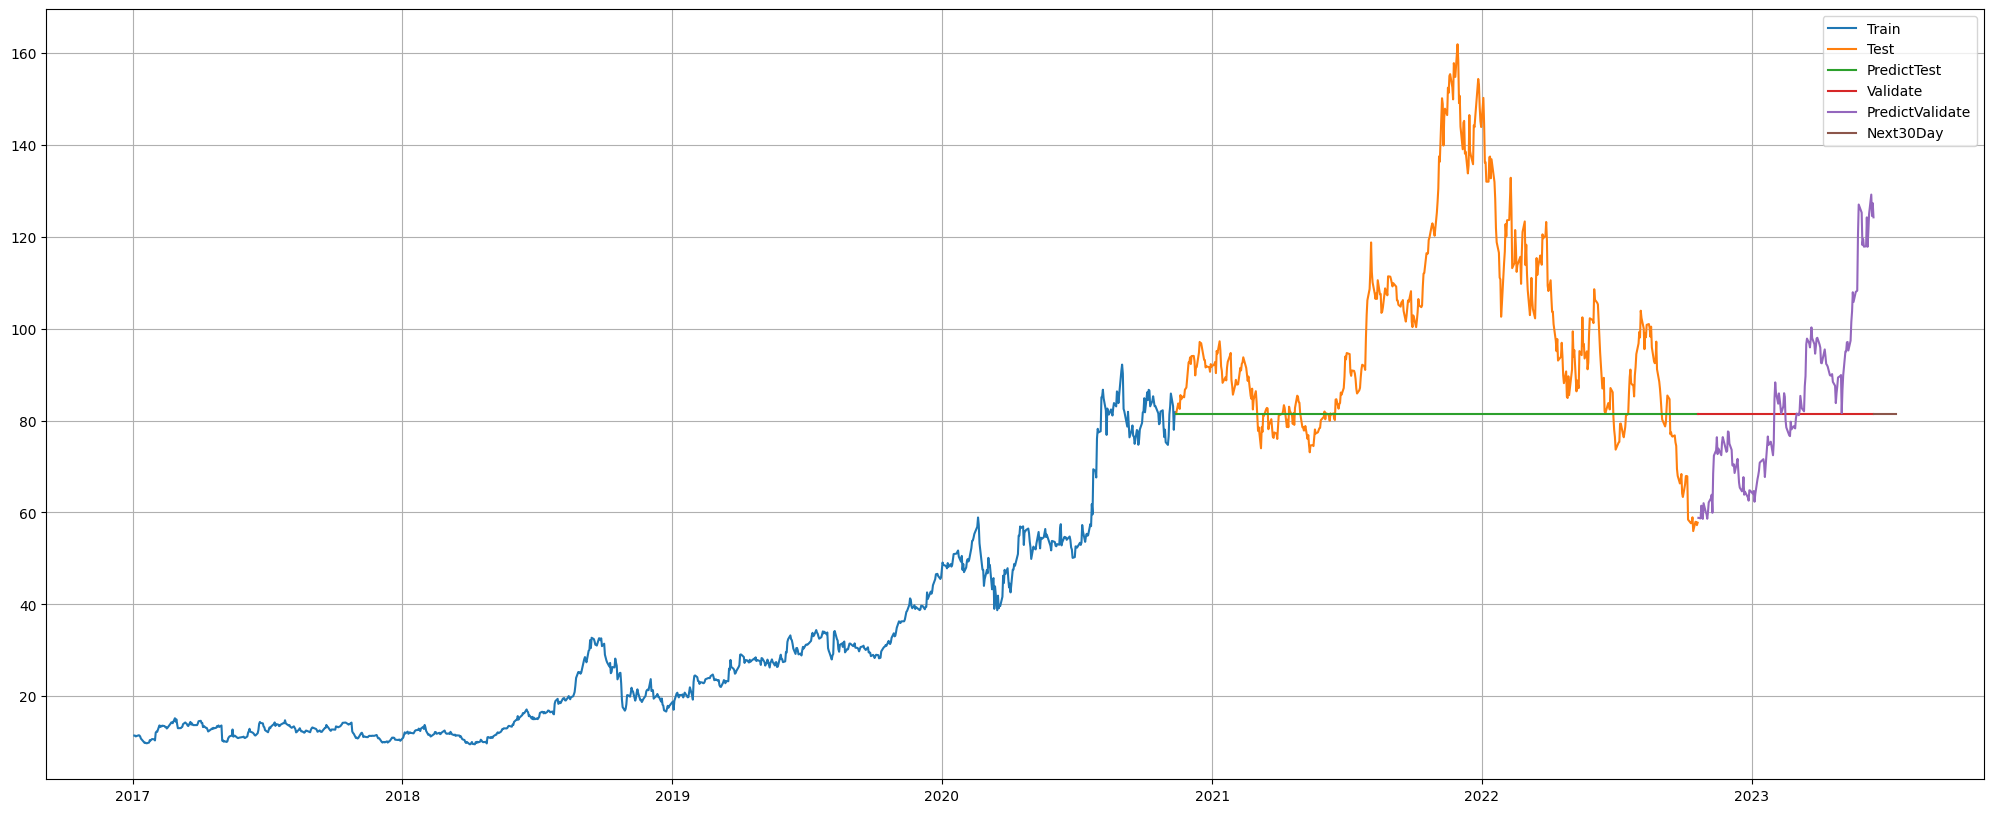

In [37]:
# Drawing
plt.figure(figsize=(25, 10))
plt.plot(df.index[:train_size], train_data)
plt.plot(df.index[train_size : train_size + test_size], test_data)
plt.plot(df.index[train_size : train_size + test_size], y_pred)
plt.plot(df.index[train_size + test_size :], y_pred_val)
plt.plot(df.index[train_size + test_size :], val_data)
plt.plot(index_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'PredictTest', 'Validate', 'PredictValidate', 'Next30Day'])

plt.grid()
# plt.savefig('SES_AMD_631.png')
plt.show()

In [38]:
test_mse = mean_squared_error(test_data, y_pred)
print(test_mse)

742.3005091708656
